# 수치형변수 가공 데모

선형회귀나 결정트리 류의 알고리즘 사용시 수치형 변수 스케일링 작업은 의미 없음 에러 계산시 스케일링 작업 여부는 확인하지 않음¶

그러나 딥러닝, 뉴럴 네트워크 알고리즘 사용시 학습에 중요한 역할을 함

## 라이브러리 import 및 설정

In [26]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [27]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import simplefilter

In [28]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
simplefilter('ignore')

In [29]:
data_dir = Path('C:\\Users\\KimSuBeen\\Desktop\\2\\오픈소스SW설계\\단국대\\DataInput\\')
trn_file = data_dir / 'train.csv'
seed = 42

In [57]:
df = pd.read_csv(trn_file, index_col=0)
print(df.shape)
df.iloc[0:19,0:19]

(320000, 19)


u          g          r          i          z  redshift   dered_u  \
id                                                                              
0   23.263956  20.336773  19.009500  17.672439  16.939607 -0.000081  23.12426   
1   15.052147  14.061969  13.452418  13.268450  13.168941  0.004506  14.96642   
2   16.786385  15.825426  15.536318  15.393535  15.350032  0.000472  16.60765   
3   25.660638  21.188727  20.221158  19.894949  19.634649  0.000006  25.35365   
4   24.453429  20.699170  19.042368  18.324152  17.982649 -0.000033  23.77140   
5   16.700402  15.506766  14.978825  14.675482  14.515478  0.014955  16.51564   
6   23.906276  20.847207  19.978427  19.495200  19.052571 -0.000042  23.84584   
7   19.142311  17.560843  16.801548  16.363787  16.079607  0.103124  18.83542   
8   18.581256  17.286786  16.677022  16.272811  16.037178  0.083884  18.29758   
9   20.686012  19.725662  19.388249  19.273578  19.259566  0.000343  20.61129   
10  19.041937  18.016629  17.672307  17.387389  17.229920  0.084437  18.89577   
11  18.906671  17.700545  17.738433  17.803667  17.917356  0.000124  18.83460   
12  19.522422  18.074429  17.259074  16.804034  16.469415  0.127092  19.48295   
13  22.461142  19.909752  18.449854  17.661854  17.194024 -0.000058  22.59991   
14  17.195800  16.133867  15.985079  15.987387  16.058278 -0.000431  17.15679   
15  19.462373  18.531918  18.141657  18.008569  17.915552  0.000326  19.36848   
16  20.150170  18.930052  18.957463  19.017862  18.999911 -0.000494  20.03771   
17  27.349750  17.112947  16.757225  16.006054  25.276352  0.000051  24.19727   
18  18.829194  17.041637  16.354528  16.121175  16.025075 -0.000064  18.66412   

     dered_g   dered_r   dered_i   dered_z  nObserve  nDetect  airmass_u  \
id                                                                         
0   20.25779  18.95512  17.63211  16.90894        18       18   1.189764   
1   14.00452  13.41139  13.23625  13.13468         1        1   1.253254   
2   15.68659  15.44004  15.32173  15.29608         2        2   1.022499   
3   20.99465  20.08727  19.79465  19.55518         4        3   1.205399   
4   20.43384  18.86299  18.19028  17.87592        13       12   1.193946   
5   15.37761  14.88758  14.60550  14.45388         1        1   1.172191   
6   20.70001  19.87659  19.42051  19.00401         2        2   1.201924   
7   17.35197  16.65647  16.25461  15.99042         2        2   1.173380   
8   17.06158  16.52144  16.15749  15.95350         4        4   1.318398   
9   19.62088  19.32146  19.23181  19.28542         2        2   1.252748   
10  17.89833  17.59101  17.32773  17.19039         3        3   1.142021   
11  17.64367  17.69924  17.77473  17.89669         2        2   1.260148   
12  18.04358  17.23774  16.78819  16.45765         1        1   1.190898   
13  19.81927  18.38482  17.61413  17.16473        21       21   1.309779   
14  16.09979  15.96315  15.97266  16.05171         2        2   1.194503   
15  18.44988  18.08563  17.96840  17.89419         2        2   1.454391   
16  18.79111  18.86992  18.96793  19.04240         2        2   1.051386   
17  17.06068  16.71559  15.97804  23.72120         2        1   1.027177   
18  16.91643  16.26742  16.05595  15.97544         1        1   1.250146   

    airmass_g  airmass_r  airmass_i  airmass_z  class  
id                                                     
0    1.190681   1.188979   1.189355   1.190206      0  
1    1.257836   1.248762   1.250997   1.255533      1  
2    1.024105   1.020983   1.021730   1.023291      0  
3    1.206058   1.204874   1.205120   1.205712      0  
4    1.194285   1.193738   1.193826   1.194099      0  
5    1.178541   1.166002   1.169076   1.175344      2  
6    1.202019   1.201963   1.201927   1.201954      0  
7    1.177078   1.169829   1.171587   1.175211      2  
8    1.328035   1.309011   1.313671   1.323179      2  
9    1.246767   1.258913   1.255805   1.249734      0  
10   1.143600   1.140565   1.141278   1.1

## EDA (Exploratory Data Analysis)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   u          320000 non-null  float64
 1   g          320000 non-null  float64
 2   r          320000 non-null  float64
 3   i          320000 non-null  float64
 4   z          320000 non-null  float64
 5   redshift   320000 non-null  float64
 6   dered_u    320000 non-null  float64
 7   dered_g    320000 non-null  float64
 8   dered_r    320000 non-null  float64
 9   dered_i    320000 non-null  float64
 10  dered_z    320000 non-null  float64
 11  nObserve   320000 non-null  int64  
 12  nDetect    320000 non-null  int64  
 13  airmass_u  320000 non-null  float64
 14  airmass_g  320000 non-null  float64
 15  airmass_r  320000 non-null  float64
 16  airmass_i  320000 non-null  float64
 17  airmass_z  320000 non-null  float64
 18  class      320000 non-null  int64  
dtypes: float64(16), int64(3

#### 전체적으로 총 19개의 정수/실수 수치형 변수가 있다.  만약 결측값이 있음 정수더라도 실수로 판단 내릴 수 있음
#### 혹시 몰라 아래는 결측값 확인

In [32]:
df.isnull().any()

u            False
g            False
r            False
i            False
z            False
redshift     False
dered_u      False
dered_g      False
dered_r      False
dered_i      False
dered_z      False
nObserve     False
nDetect      False
airmass_u    False
airmass_g    False
airmass_r    False
airmass_i    False
airmass_z    False
class        False
dtype: bool

In [33]:
df.describe()

u              g              r              i  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       19.852429      18.376837      17.735761      17.174226   
std         1.945548      31.110759       1.466242      52.561464   
min       -17.687512  -17555.365606       7.731354  -23955.817764   
25%        18.724150      17.474851      16.877190      16.523876   
50%        19.419439      18.140528      17.525850      17.149736   
75%        20.432092      19.073172      18.428089      18.007435   
max        58.623328      46.338272      72.009662      50.164052   

                   z       redshift        dered_u        dered_g  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       16.875187       0.058308      19.628874      18.227087   
std        57.146264       0.575457       1.923586      17.786568   
min    -23955.817764    -166.048260     -42.837530   -9999.000000   
25%        16.288890       0.000036      18.563598      17.348370   
50%        16.917610       0.047129      19.264635      18.022410   
75%        17.728924       0.094597      20.197603      18.888443   
max        52.612664      62.323343      30.777850      30.613170   

             dered_r        dered_i        dered_z       nObserve  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       17.615434      17.152347      16.869277       6.332700   
std         1.473020      25.075760      35.436549       8.881129   
min       -16.380230   -9999.000000   -9999.000000       1.000000   
25%        16.787138      16.453048      16.234063       1.000000   
50%        17.443415      17.087370      16.869390       2.000000   
75%        18.291078      17.906960      17.655653       5.000000   
max        31.957200      32.016220      30.781270      44.000000   

             nDetect      airmass_u      airmass_g      airmass_r  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean        6.138816       1.175763       1.176528       1.175131   
std         8.551634       0.116297       0.118065       0.114723   
min         1.000000       1.000059       1.000012       1.000157   
25%         1.000000       1.088220       1.088448       1.087763   
50%         2.000000       1.179350       1.179235       1.179375   
75%         5.000000       1.227540       1.225990       1.229236   
max        42.000000       2.050775       2.080287       2.022134   

           airmass_i      airmass_z          class  
count  320000.000000  320000.000000  320000.000000  
mean        1.175430       1.176128       1.116322  
std         0.115485       0.117156       0.923455  
min         1.000105       1.000027       0.000000  
25%         1.088021       1.088299       0.000000  
50%         1.179377       1.179303       1.000000  
75%         1.228599       1.226757       2.000000  
max         2.036329       2.065390       2.000000

In [69]:
num_cols = [x for x in df.columns if df[x].dtype in [np.int64, np.float64, df.drop('class',axis=1)]]
num_cols.remove('class')
print(num_cols)

#목표는 class 예측
#X = [df.drop('class', axis=1)]


['u', 'g', 'r', 'i', 'z', 'redshift', 'dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z', 'nObserve', 'nDetect', 'airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z']


In [70]:
#멱함수 분포: x값이 증가할 수록 y값은 높은 곳에서 포물선을 그리고 낮아지는 함수를 말함
#종속변수를 그대로 선형회귀 모델 학습에 사용한 경우 예측값에 음수가 존재하고 적은 값 예측에 오차자 맣이 발생한다.

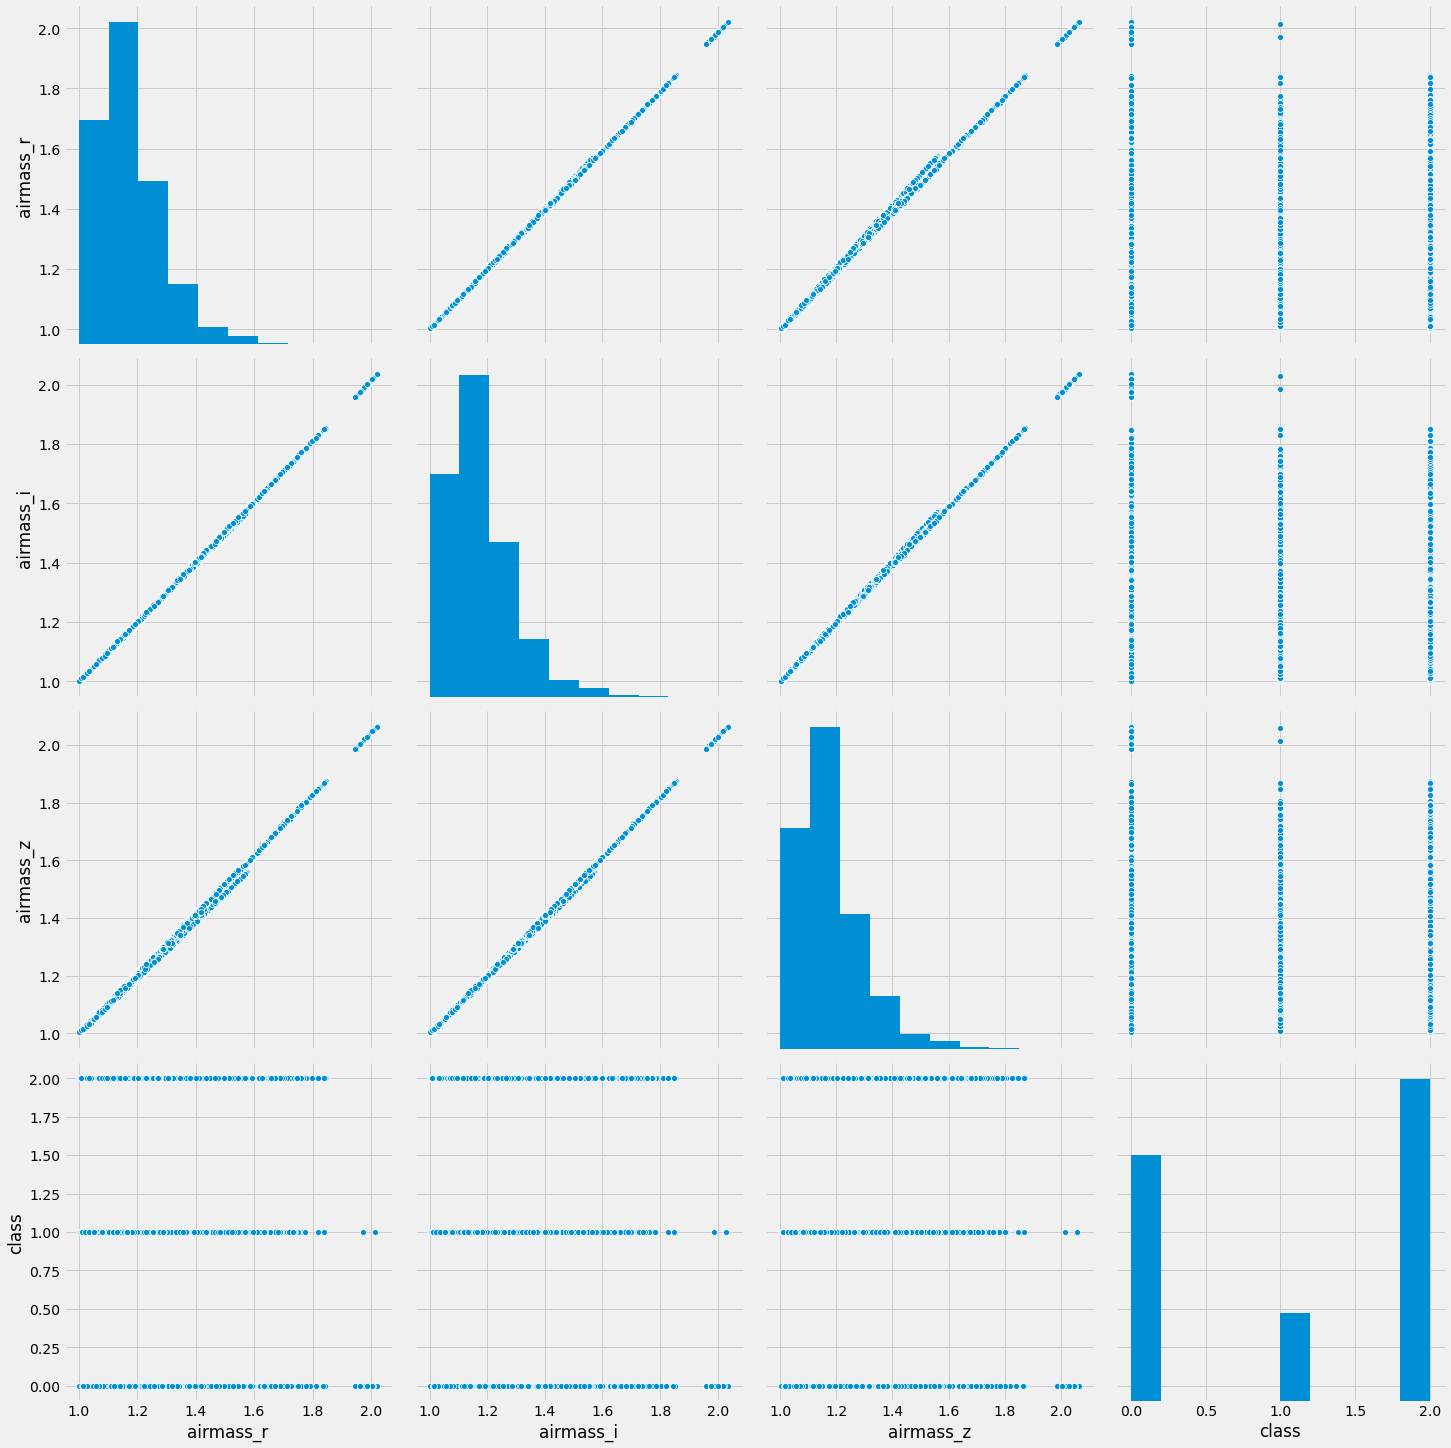

In [71]:
sns.pairplot(data=df, vars=['airmass_r']+['airmass_i']+['airmass_z']+ ['class'], size=5)

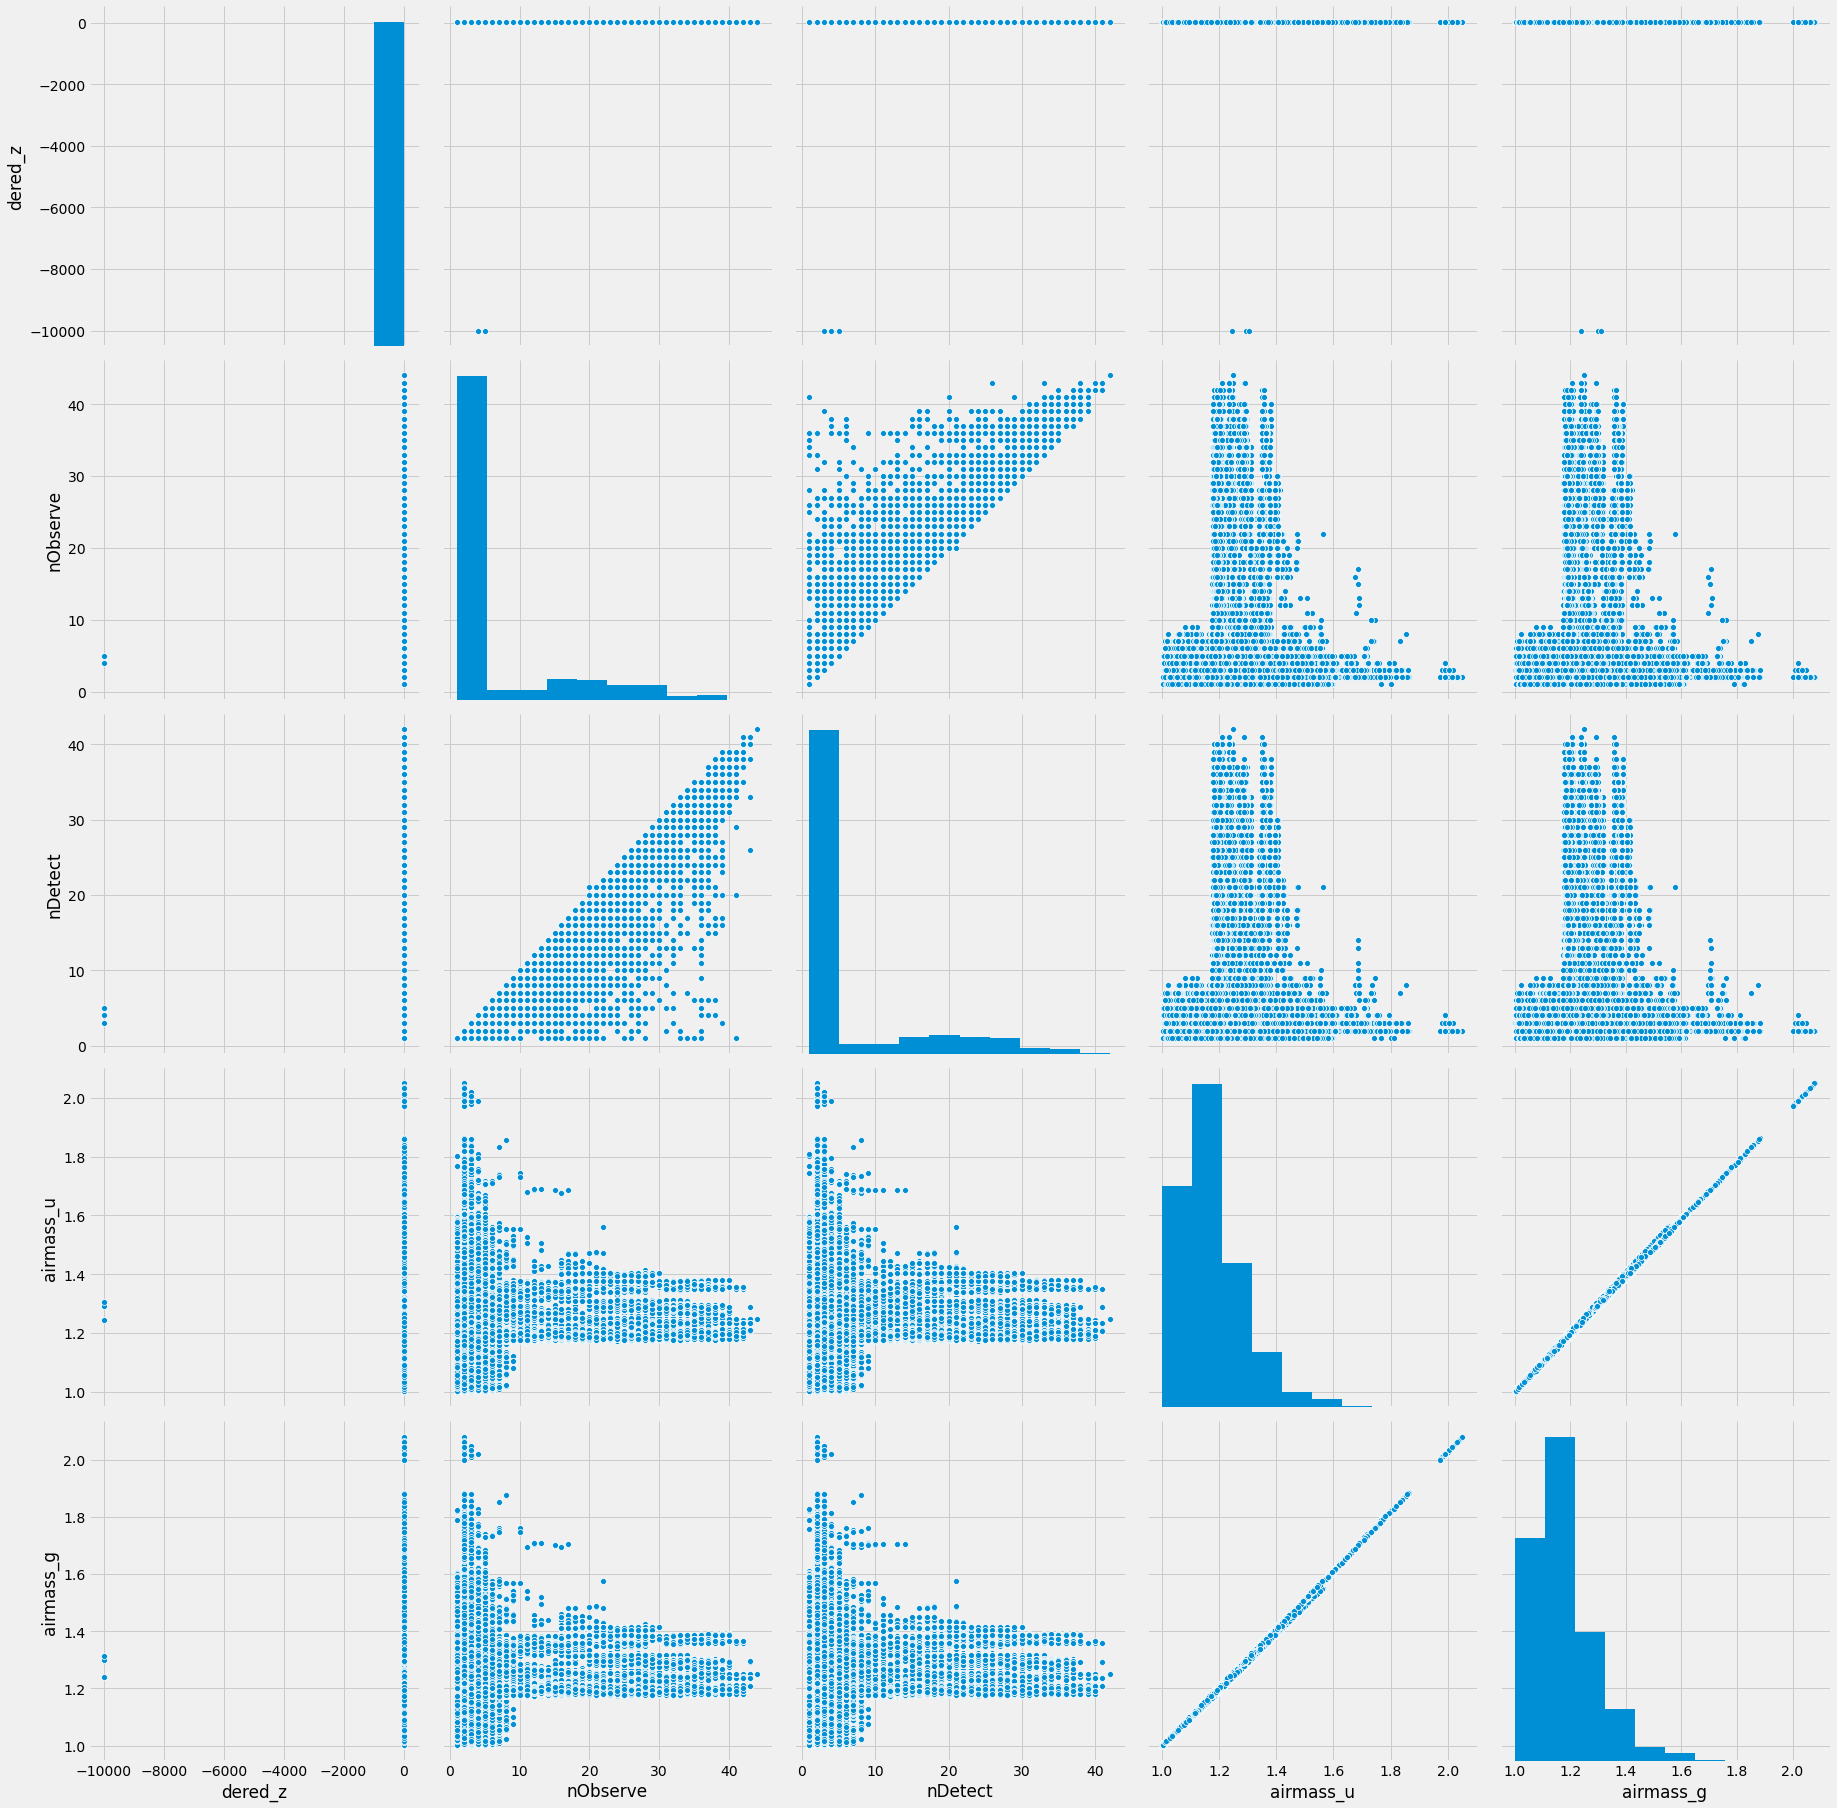

In [72]:
sns.pairplot(data=df, vars=['dered_z'] +['nObserve']+['nDetect']+['airmass_u']+['airmass_g'], size=5)

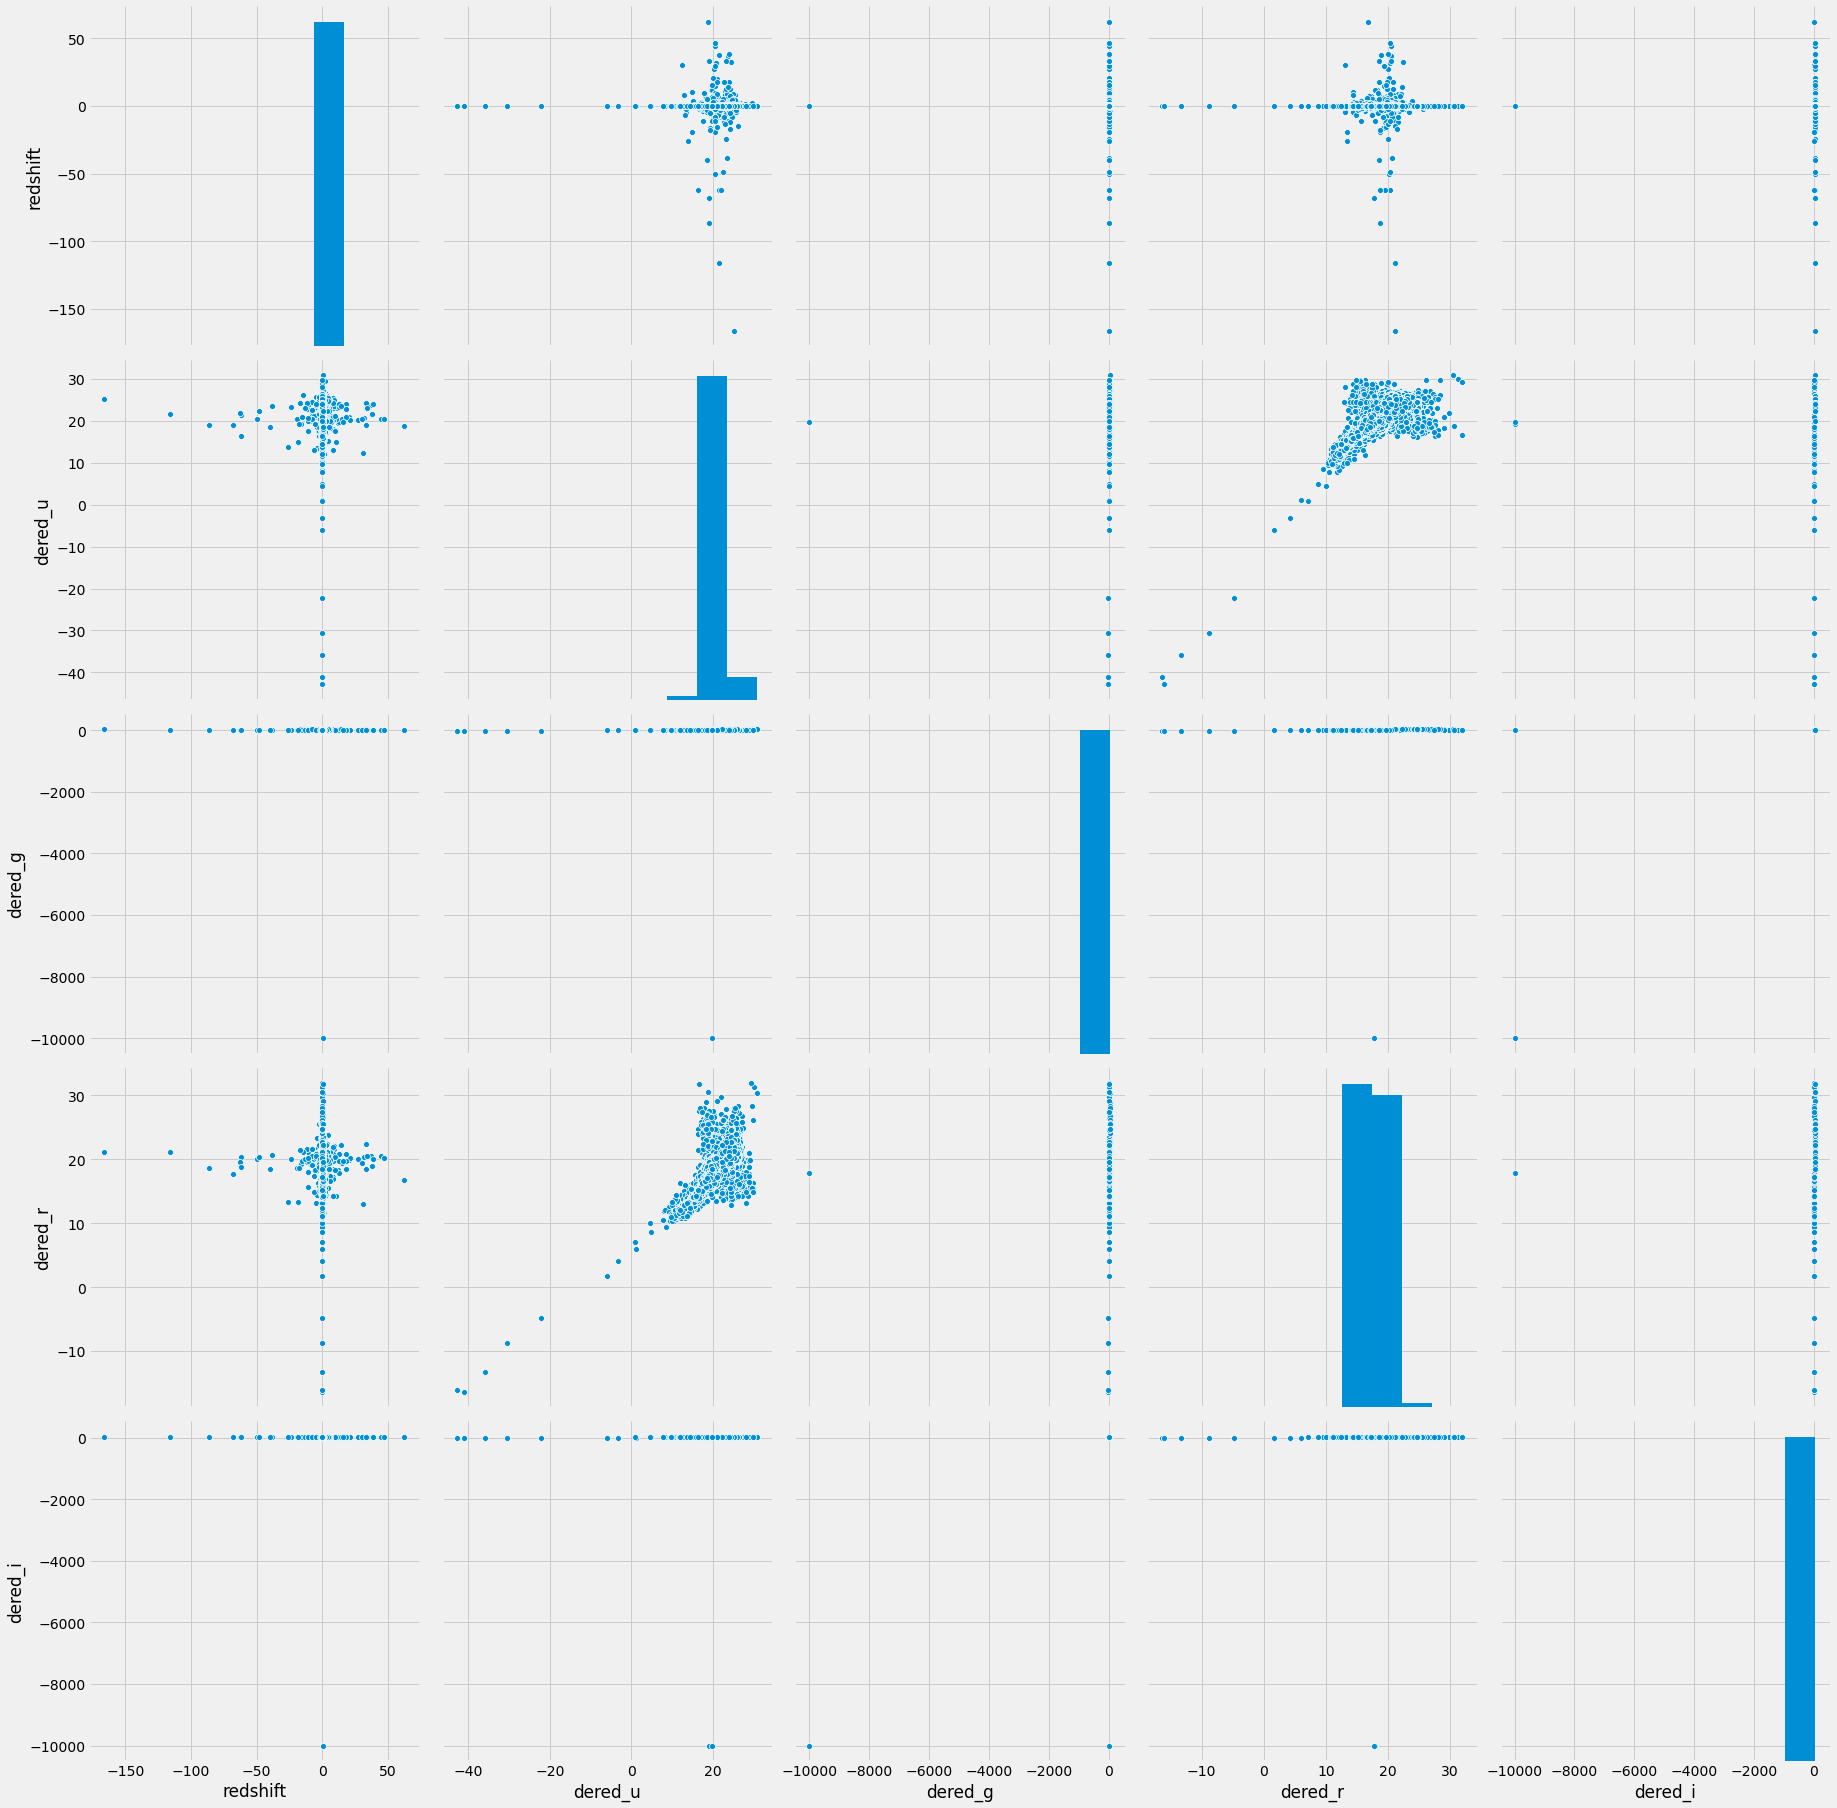

In [73]:
sns.pairplot(data=df, vars=['redshift']+[ 'dered_u']+ ['dered_g']+ ['dered_r']+ ['dered_i'], size=5)

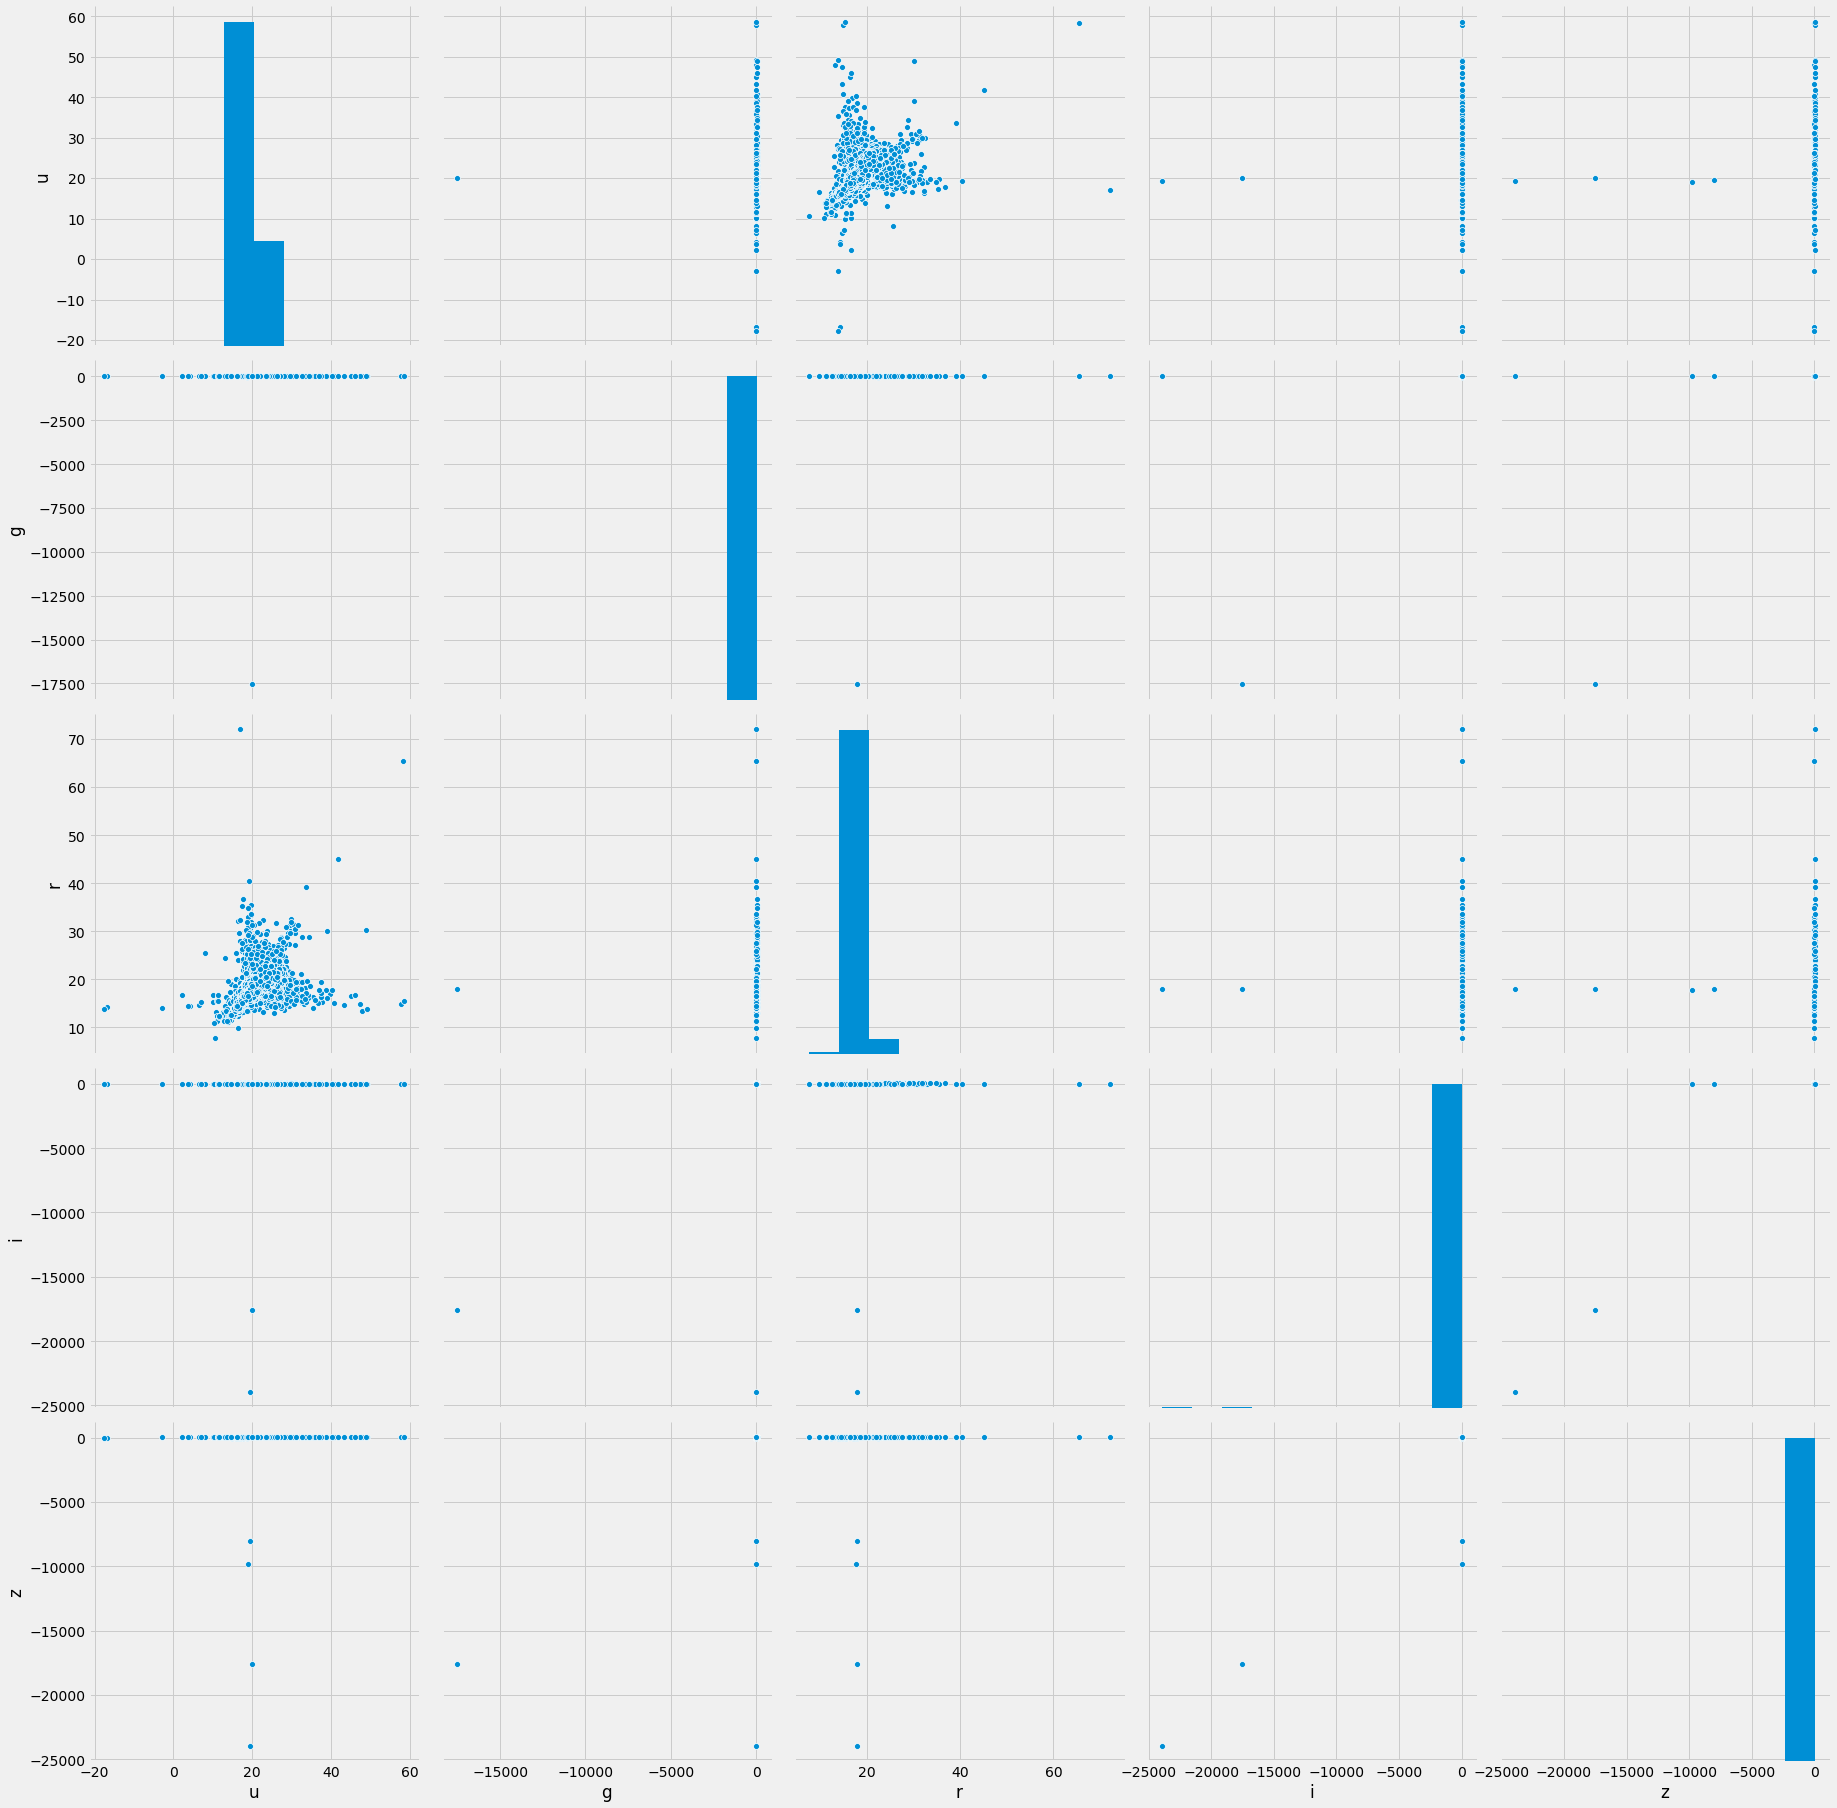

In [74]:
sns.pairplot(data=df, vars=['u'] + ['g'] + ['r'] + ['i'] + ['z'], size=5)

#### nOserver 부터 airmass_z 까진 멱함수 분포를 보임 정규분포 보이기 위해 log1p() 로 정규분포를 띄게 만듬
#### 추가로 1더하는 이유는 0의 경우 로그로 취할 경우 로그 0은 무한대로 표현해야함 이는 좀 그럼 그래서 1더함
#### 나중에 계산 다끝나고 원래 멱으로 되돌릴 필요 있음 그때 np.expm1()  사용하여 역변환 시킴
#### 나머진..

# 선형회귀 모델 학습
## RMSE/RMLSE 손실함수 정의

In [75]:
rmse = lambda y, p: np.sqrt(mean_squared_error(y, p))
rmsle = lambda y, p: np.sqrt(mean_squared_error(np.log1p(y), np.log1p(p)))

## 변수 가공없이 선형회귀 모델 학습

In [88]:
lr = LinearRegression()
#nObserver 부터 해봤는데 뭔지 모그렜고 다 0임.. 
#칼럼 변수 숙지가 제대로 안되어 있어서 뭘 타겟으로 잡고 예측값을 추정해야하는지 모르겠음 공부할것
target_col='class' #종속변수
pred_col='pred'
lr.fit(df[num_cols], df[target_col])#종속변수에 로그(np.log1p)를 취함
df[pred_col] = lr.predict(df[num_cols])#예측값은 역변환(np.expm1)하여 저장

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        0.82


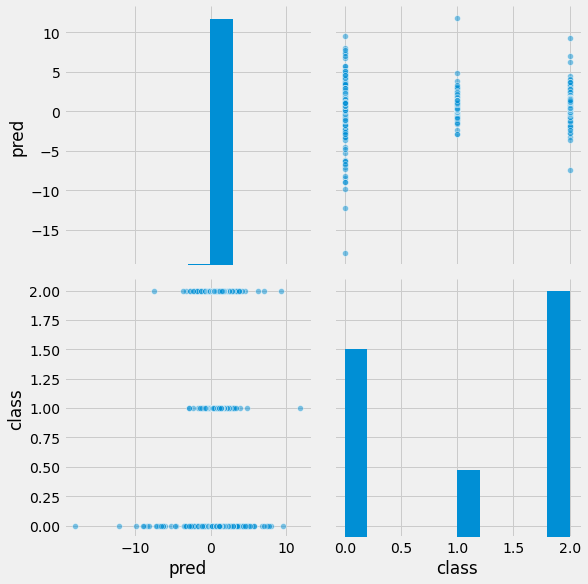

In [78]:
sns.pairplot(data=df, vars=[pred_col, target_col], size=4, plot_kws={'alpha': .5})

#### 예측값 모두 양수값 비교적 예측은 오차없이 비슷하게 나욤.
### 멱함수 분포 변수 log1p 변환

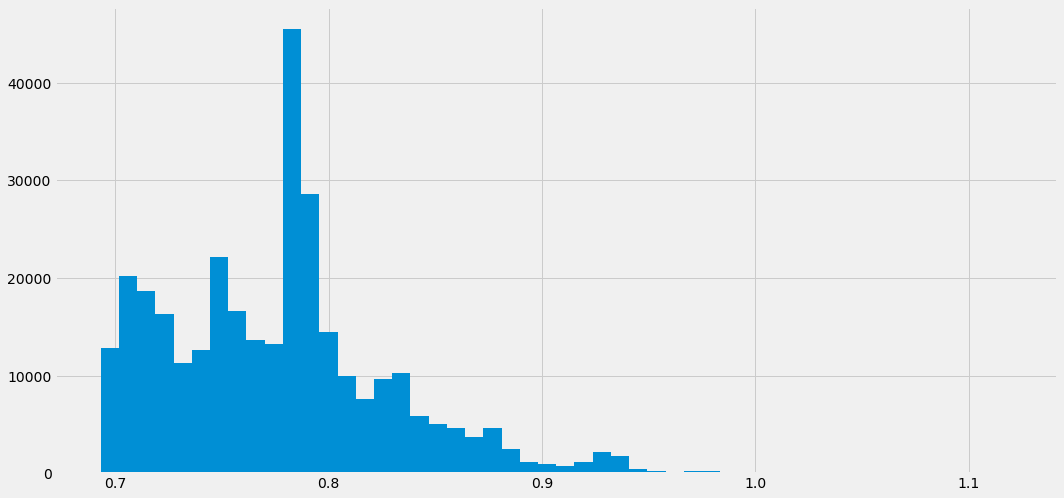

In [89]:
df.airmass_z.apply(np.log1p).hist(bins=50)

#### 멱함수 분포의 수치형 변수는 np.log1p() 함수로 정규분포에 가깝게? 변환할 수 있다. 역변환은 np.expm1() 함수를 이용하면 된다.

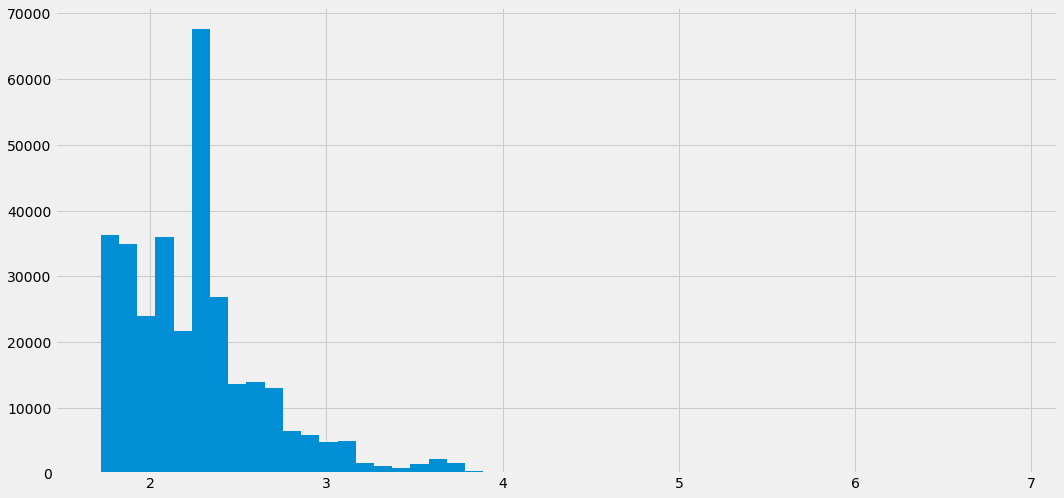

In [44]:
#df.airmass_z.apply(np.expm1).hist(bins=50) #역변환

## 선형회귀 로그함수 적용

In [90]:
lr = LinearRegression()
lr.fit(df[num_cols], np.log1p(df[target_col]))#종속에만 로그 적용
df[pred_col] = np.expm1(lr.predict(df[num_cols]))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')#로그를 적용한 독립변수와 종속변수
print(f'RMSLE:\t{rmsle(df[target_col], df[pred_col]):12.2f}')#+에러 계산법에도 로그를 적용

 RMSE:	        1.54
RMSLE:	        0.45


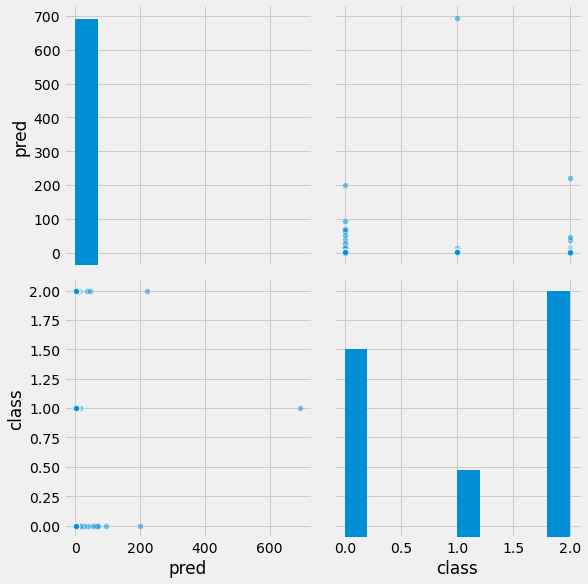

In [82]:
sns.pairplot(data=df, vars=[pred_col, target_col], size=4, plot_kws={'alpha': .5})

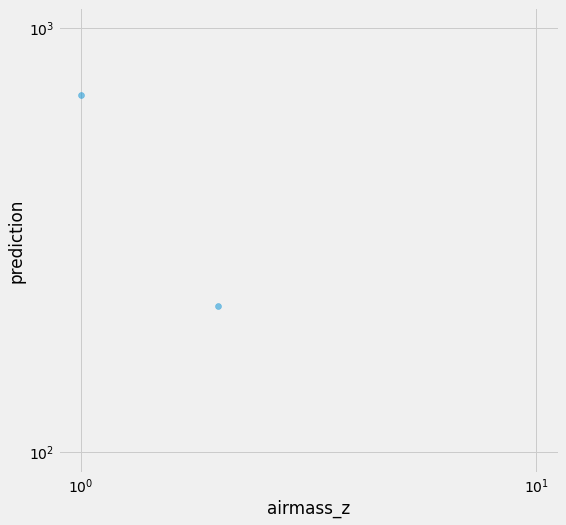

In [83]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('airmass_z')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')

In [48]:
df[num_cols].describe()

u              g              r              i  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       19.852429      18.376837      17.735761      17.174226   
std         1.945548      31.110759       1.466242      52.561464   
min       -17.687512  -17555.365606       7.731354  -23955.817764   
25%        18.724150      17.474851      16.877190      16.523876   
50%        19.419439      18.140528      17.525850      17.149736   
75%        20.432092      19.073172      18.428089      18.007435   
max        58.623328      46.338272      72.009662      50.164052   

                   z       redshift        dered_u        dered_g  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       16.875187       0.058308      19.628874      18.227087   
std        57.146264       0.575457       1.923586      17.786568   
min    -23955.817764    -166.048260     -42.837530   -9999.000000   
25%        16.288890       0.000036      18.563598      17.348370   
50%        16.917610       0.047129      19.264635      18.022410   
75%        17.728924       0.094597      20.197603      18.888443   
max        52.612664      62.323343      30.777850      30.613170   

             dered_r        dered_i        dered_z       nObserve  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       17.615434      17.152347      16.869277       6.332700   
std         1.473020      25.075760      35.436549       8.881129   
min       -16.380230   -9999.000000   -9999.000000       1.000000   
25%        16.787138      16.453048      16.234063       1.000000   
50%        17.443415      17.087370      16.869390       2.000000   
75%        18.291078      17.906960      17.655653       5.000000   
max        31.957200      32.016220      30.781270      44.000000   

             nDetect      airmass_u      airmass_g      airmass_r  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean        6.138816       1.175763       1.176528       1.175131   
std         8.551634       0.116297       0.118065       0.114723   
min         1.000000       1.000059       1.000012       1.000157   
25%         1.000000       1.088220       1.088448       1.087763   
50%         2.000000       1.179350       1.179235       1.179375   
75%         5.000000       1.227540       1.225990       1.229236   
max        42.000000       2.050775       2.080287       2.022134   

           airmass_i      airmass_z          class  
count  320000.000000  320000.000000  320000.000000  
mean        1.175430       1.176128       1.116322  
std         0.115485       0.117156       0.923455  
min         1.000105       1.000027       0.000000  
25%         1.088021       1.088299       0.000000  
50%         1.179377       1.179303       1.000000  
75%         1.228599       1.226757       2.000000  
max         2.036329       2.065390       2.000000

In [91]:
df[['nDetect', 'airmass_u', 'airmass_g', 'airmass_r', 'airmass_i']] = df[['nDetect', 'airmass_u', 'airmass_g', 'airmass_r', 'airmass_i']].apply(np.log1p)
df[num_cols].describe()

u              g              r              i  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       19.852429      18.376837      17.735761      17.174226   
std         1.945548      31.110759       1.466242      52.561464   
min       -17.687512  -17555.365606       7.731354  -23955.817764   
25%        18.724150      17.474851      16.877190      16.523876   
50%        19.419439      18.140528      17.525850      17.149736   
75%        20.432092      19.073172      18.428089      18.007435   
max        58.623328      46.338272      72.009662      50.164052   

                   z       redshift        dered_u        dered_g  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       16.875187       0.058308      19.628874      18.227087   
std        57.146264       0.575457       1.923586      17.786568   
min    -23955.817764    -166.048260     -42.837530   -9999.000000   
25%        16.288890       0.000036      18.563598      17.348370   
50%        16.917610       0.047129      19.264635      18.022410   
75%        17.728924       0.094597      20.197603      18.888443   
max        52.612664      62.323343      30.777850      30.613170   

             dered_r        dered_i        dered_z       nObserve  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       17.615434      17.152347      16.869277       6.332700   
std         1.473020      25.075760      35.436549       8.881129   
min       -16.380230   -9999.000000   -9999.000000       1.000000   
25%        16.787138      16.453048      16.234063       1.000000   
50%        17.443415      17.087370      16.869390       2.000000   
75%        18.291078      17.906960      17.655653       5.000000   
max        31.957200      32.016220      30.781270      44.000000   

             nDetect      airmass_u      airmass_g      airmass_r  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean        0.847598       0.573933       0.574099       0.573797   
std         0.324673       0.029132       0.029479       0.028826   
min         0.526589       0.526606       0.526593       0.526635   
25%         0.526589       0.551763       0.551826       0.551637   
50%         0.741276       0.576066       0.576037       0.576073   
75%         1.026672       0.588285       0.587899       0.588708   
max         1.560500       0.749242       0.753783       0.744773   

           airmass_i      airmass_z  
count  320000.000000  320000.000000  
mean        0.573861       1.176128  
std         0.028974       0.117156  
min         0.526620       1.000027  
25%         0.551708       1.088299  
50%         0.576073       1.179303  
75%         0.588549       1.226757  
max         0.746996       2.065390

#### 멱함수 값들이 정규화 된 느낌.

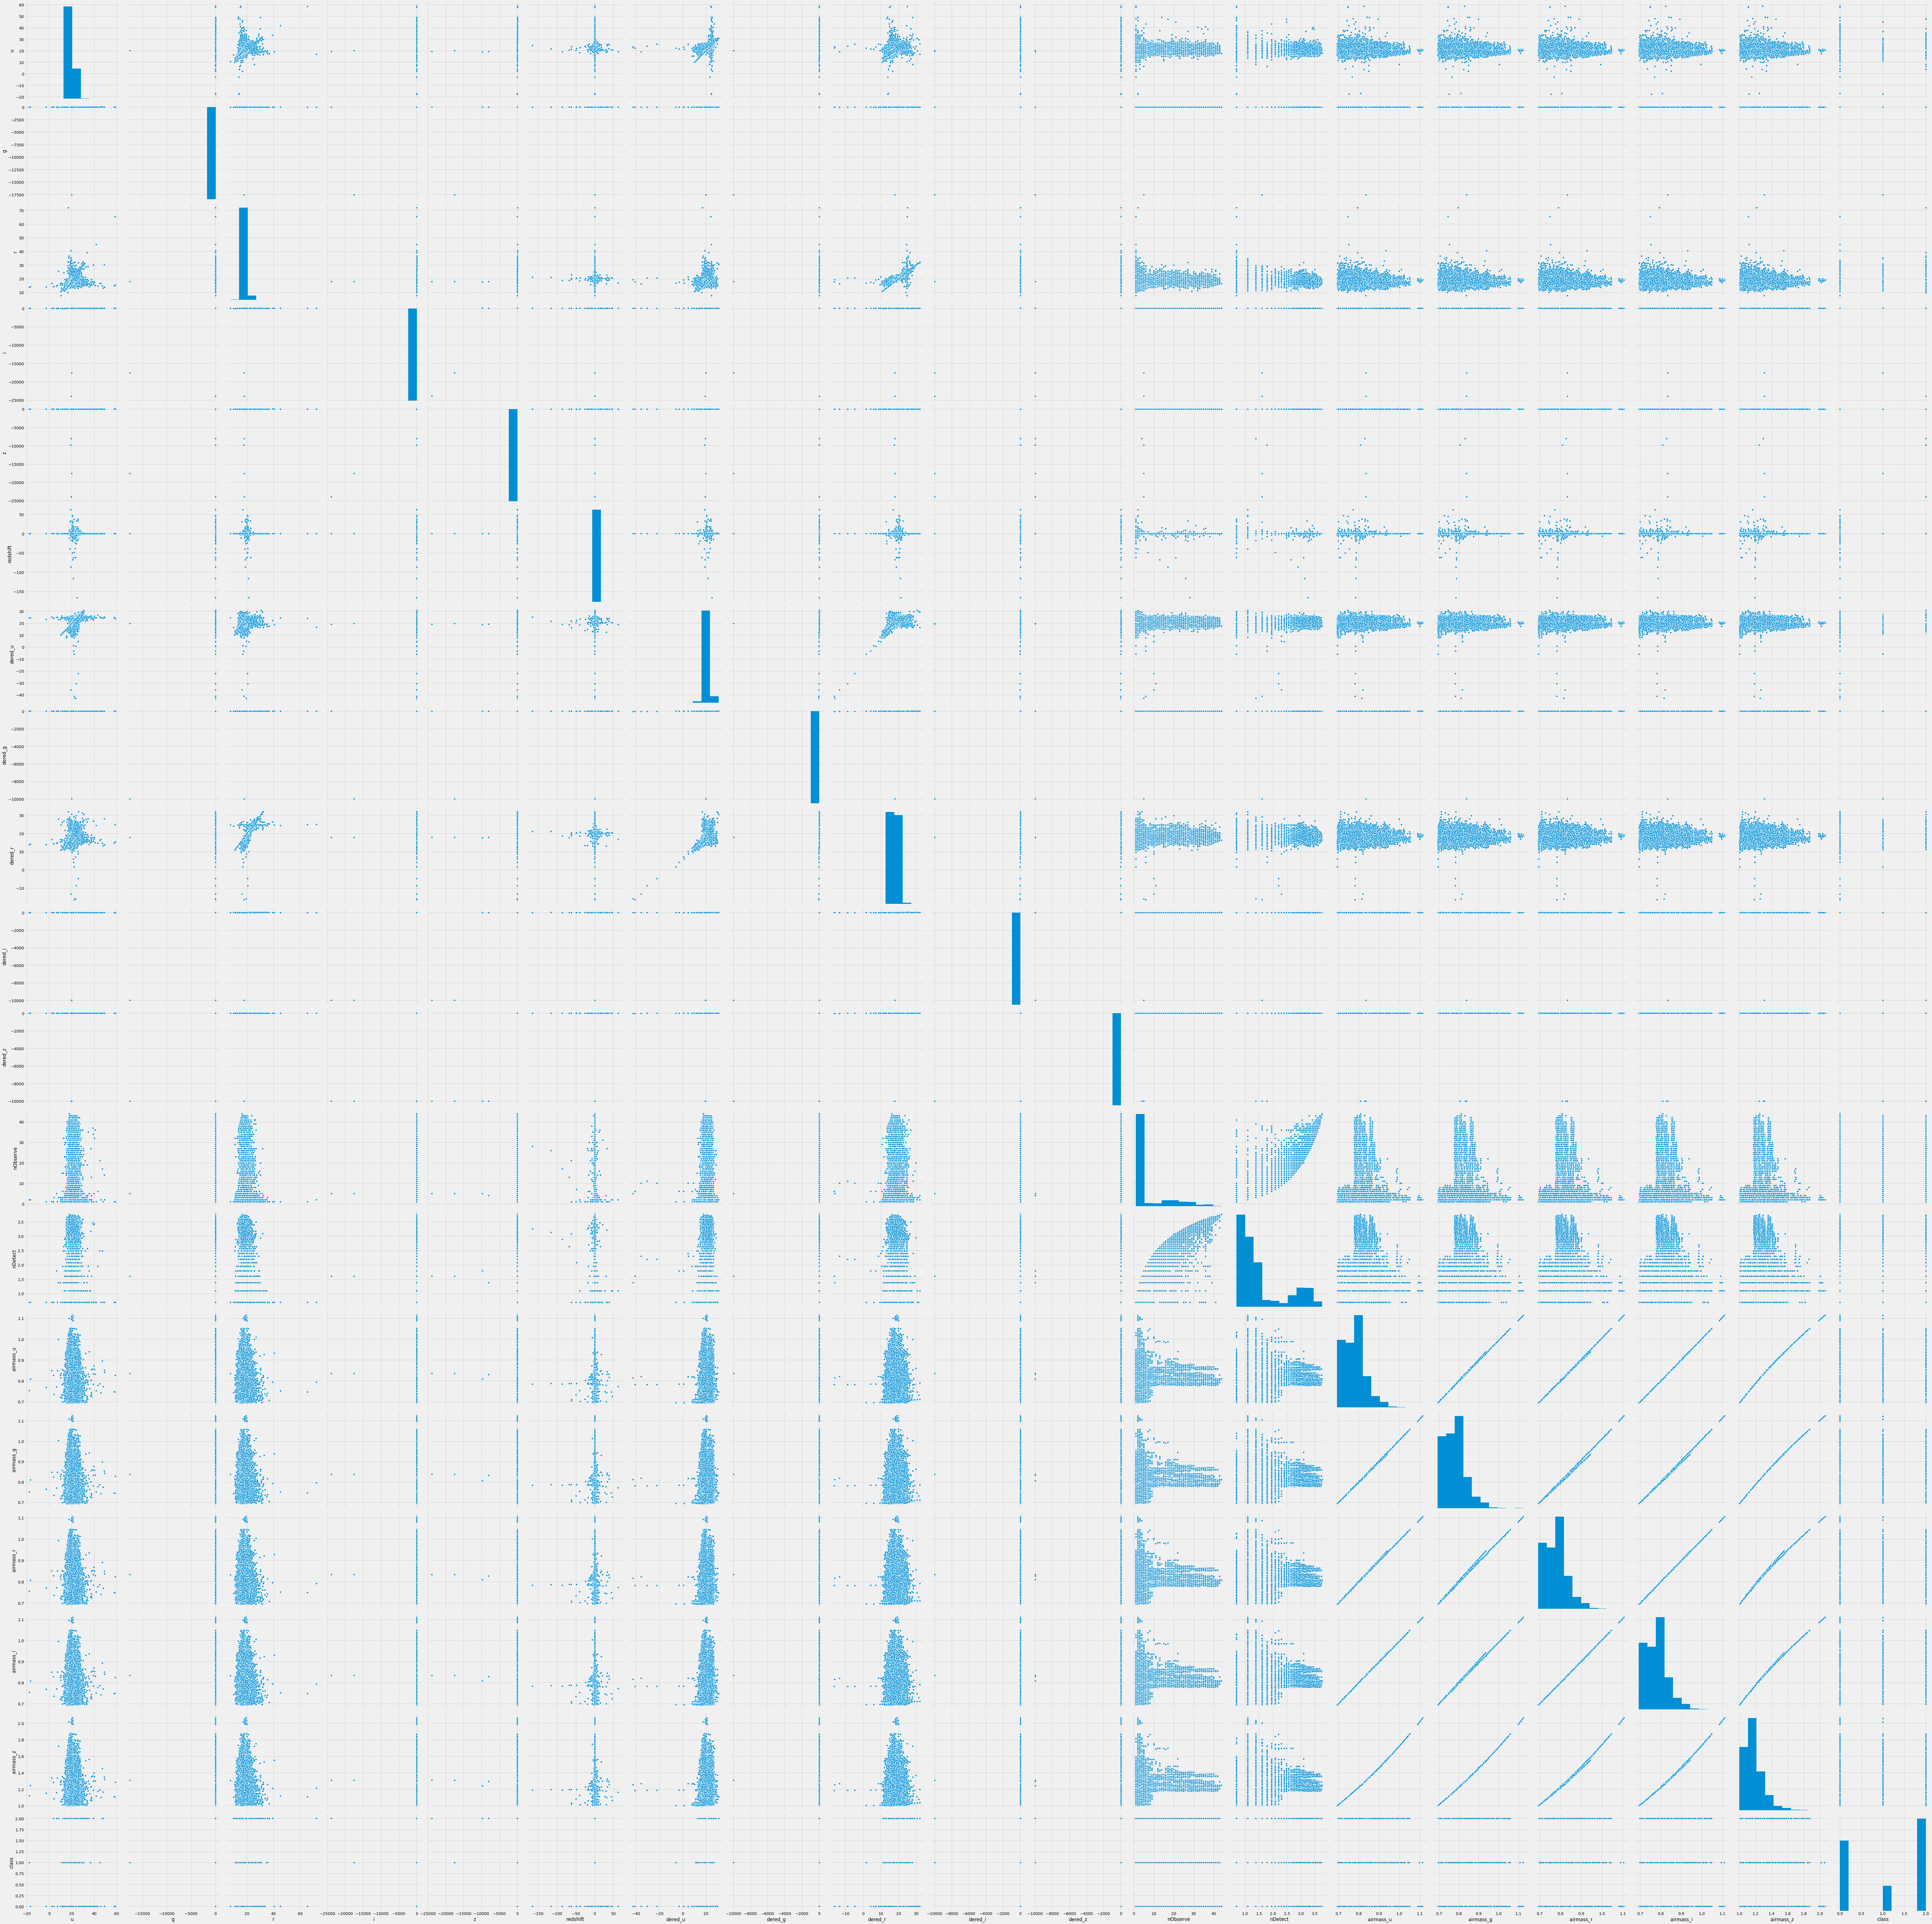

In [50]:
sns.pairplot(data=df, vars=num_cols, size=5)

In [92]:
lr = LinearRegression()
lr.fit(df[num_cols], np.log1p(df[target_col]))#종속 변수만 로그적용
df[pred_col] = np.expm1(lr.predict(df[num_cols]))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')#이것만 걔선
print(f'RMSLE:\t{rmsle(df[target_col], df[pred_col]):12.2f}')#독립 로그취하나 안취하나 똑같음

 RMSE:	        1.54
RMSLE:	        0.45


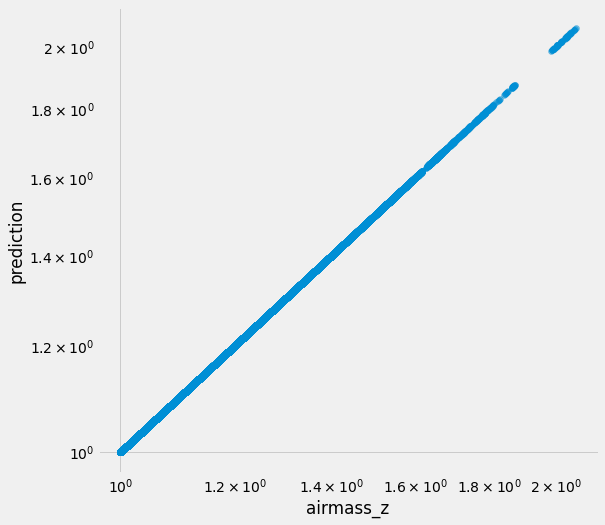

In [52]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('airmass_z')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')

In [53]:
df.head()

u          g          r          i          z  redshift   dered_u  \
id                                                                              
0   23.263956  20.336773  19.009500  17.672439  16.939607 -0.000081  23.12426   
1   15.052147  14.061969  13.452418  13.268450  13.168941  0.004506  14.96642   
2   16.786385  15.825426  15.536318  15.393535  15.350032  0.000472  16.60765   
3   25.660638  21.188727  20.221158  19.894949  19.634649  0.000006  25.35365   
4   24.453429  20.699170  19.042368  18.324152  17.982649 -0.000033  23.77140   

     dered_g   dered_r   dered_i   dered_z  nObserve   nDetect  airmass_u  \
id                                                                          
0   20.25779  18.95512  17.63211  16.90894        18  2.944439   0.783794   
1   14.00452  13.41139  13.23625  13.13468         1  0.693147   0.812375   
2   15.68659  15.44004  15.32173  15.29608         2  1.098612   0.704334   
3   20.99465  20.08727  19.79465  19.55518         4  1.386294   0.790908   
4   20.43384  18.86299  18.19028  17.87592        13  2.564949   0.785702   

    airmass_g  airmass_r  airmass_i  airmass_z  class      pred  
id                                                               
0    0.784212   0.783435   0.783607   1.190206      0  1.190206  
1    0.814407   0.810380   0.811373   1.255533      1  1.255533  
2    0.705128   0.703584   0.703954   1.023291      0  1.023291  
3    0.791207   0.790670   0.790782   1.205712      0  1.205712  
4    0.785856   0.785607   0.785647   1.194099      0  1.194099

## 정규화/스케일링

In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [97]:
scaler = StandardScaler()#정규화 함수 적용
X = scaler.fit_transform(df[num_cols])#독립변수에 정규화 함수 적용한 scaler 적용 

lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))
#개선된것 같지 않음
print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMSE:\t{rmsle(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        1.54
RMSE:	        0.45


In [98]:
scaler = MinMaxScaler()#최소최대 함수 적용
X = scaler.fit_transform(df[num_cols])# 독립변수에 최소최대 함수 적용한 scaler 적용

lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))
#개선된 것 같지 않음
print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMSLE:\t{rmsle(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        1.54
RMSLE:	        0.45


## Binning

수치형 변수는 binning 을 통해 그룹화 하여 범주형 변수로 변환 가능

예로 영화상영시간을 4개로 그룹화 하여 나누고 각각의 독립된 칼럼으로 저장한 상태로 독립변수를 만듬 

이와 종속변수로 모델링한 결과 다소 mse가 줄어든 것으로 보임

(이를 극대화하렴 종속변수와 독립변수가 선형관계가 아니지만 타당한 관계가 증명될 경우 사용되면 향상된 모델링 가능)

In [101]:
df['airmass_z_bin'] = pd.qcut(df['airmass_z'], 4, labels=False)
#sns.pairplot(data=df, vars=['airmass_z', 'airmass_z_bin'], size=4, plot_kws={'alpha': .5})

airmass_z  airmass_z_bin
id                          
0    1.190206              2
1    1.255533              3
2    1.023291              0
3    1.205712              2
4    1.194099              2
5    1.175344              1
6    1.201954              2
7    1.175211              1
8    1.323179              3
9    1.249734              3

In [100]:
#종속변수도 그룹화 해야하나? 걍 위에 독립만 그룹화 함
#df['class_bin'] = pd.qcut(df['class'], 4, labels=False)
#sns.pairplot(data=df, vars=['class', 'class_bin'], size = 4, plot_kws={'alpha': .5})

ValueError: Bin edges must be unique: array([0., 0., 1., 2., 2.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [111]:
X = pd.concat( [  df[[ x for x in num_cols if x!='airmass_z']] , pd.get_dummies( df['airmass_z_bin'] ), pd.get_dummies( df['class'] ) ])
#X = pd.concat([df[num_cols], pd.get_dummies(pd.qcut(df['airmass_z'], 4, labels=False))], axis=1)
X.fillna(0, inplace=True)
X.shape


(960000, 21)

In [112]:
lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMSLE:\t{rmsle(df[target_col], df[pred_col]):12.2f}')

ValueError: Found input variables with inconsistent numbers of samples: [960000, 320000]

In [113]:
X = pd.concat([df[[x for x in num_cols ]], 
               pd.get_dummies(pd.qcut(df['airmass_z'], 4, labels=False))], axis=1)
X.shape

(320000, 22)

In [114]:
lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMSLE:\t{rmsle(df[target_col], df[pred_col]):12.2f}')

 RMSE:	        1.53
RMSLE:	        0.45


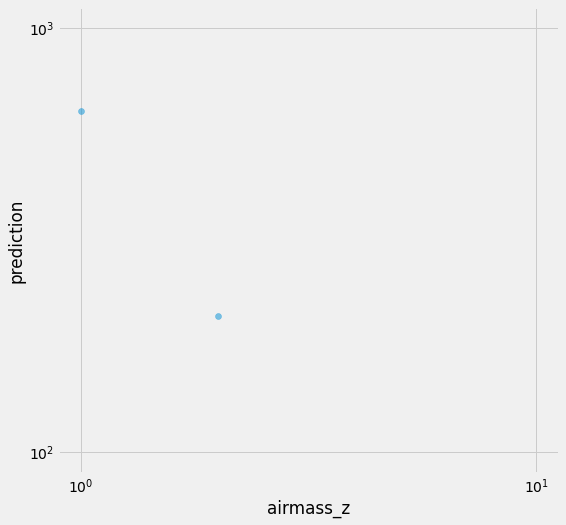

In [115]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('airmass_z')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')

## 2차 다항회귀 (Polynomial Regression)

다향 회귀는 [1,x1,x2,x1*x2,x1^2,x2^2, ... ] 변수를 생성한다. 오버피티/과적합의 위험이 있다.
두가지의 수치형변수로 다양한 표현을 나타냄 다항식처럼..

로그 취한 건만 줄고 아닌건 줄지 않고 늘음 특정손실함수에만 최적화되어 있음 

그러나 위험부담 o = 반대로 특정손실함수에는 오버피팅/과적합 위험 대상이 될 수 있음

(데이터 몇 없는데 괜히 늘리거나 과도한 다항(2항 초과_지수적으로 증가)으로 늘릴 경우 오버피팅/과적합 위험대상)

In [116]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)#2차 까지만 다항생성
X = poly.fit_transform(df[num_cols])
print(X.shape)

(320000, 190)


In [117]:
# 190개 변수가 생성됨

In [118]:
lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))
#넘 극으로 나뉨 에러 계산에 로그 안취함 망함
print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMSLE:\t{rmsle(df[target_col], df[pred_col]):12.2f}')

 RMSE:	  1590526.09
RMSLE:	        0.38


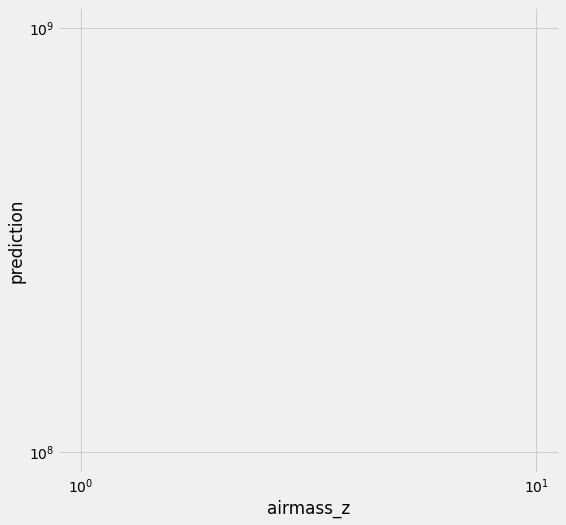

In [119]:
plt.figure(figsize=(8, 8))
plt.scatter(df[target_col], df[pred_col], alpha=.5)
plt.xlabel('airmass_z')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')